# Intro to scikit-learn, SVMs and decision trees

<hr style="clear:both">

This notebook is part of a series of exercises for the CIVIL-226 Introduction to Machine Learning for Engineers course at EPFL. Copyright (c) 2021 [VITA](https://www.epfl.ch/labs/vita/) lab at EPFL  
Use of this source code is governed by an MIT-style license that can be found in the LICENSE file or at https://www.opensource.org/licenses/MIT

**Author(s):** [David Mizrahi](mailto:david.mizrahi@epfl.ch)
<hr style="clear:both">

This is the final exercise of this course. In this exercise, we'll introduce the scikit-learn package, and use it to train SVMs and decision trees. We'll end with a small note on how to use scikit-learn for unsupervised learning techniques.


## 1. Intro to scikit-learn

[scikit-learn](https://scikit-learn.org/stable/index.html) is a very popular Python package, built on top of NumPy, which provides efficient implementations of many popular machine learning algorithms.

It can be used for:
- Generating and loading popular datasets
- Preprocessing (feature extraction and expansion, normalization)
- Supervised learning (classification and regression)
- Unsupervised learning (clustering and dimensionality reduction)
- Model selection (grid search, train/test split, cross-validation)
- Evaluation (with many metrics for all kinds of tasks)

### 1.1. Data representation in scikit-learn

In scikit-learn, data is represented in the same way it was in the previous exercises. That is:
- The features are represented as a 2D features matrix (usually named `X`), most often contained in a NumPy array or Pandas DataFrame. 
- The label (or target) array is often called `y`, and is usually contained in a NumPy array or Pandas Series.

In mathematical notation, this is:
- features: $\boldsymbol{X} \in \mathbb{R}^{N \times D}$, $\forall \ \boldsymbol{x}^{(i)} \in \boldsymbol{X}: \boldsymbol{x}^{(i)} \in \mathbb{R}^{D}$
- label (or target): $\boldsymbol{y} \in \mathbb{R}^{N}$  
where $N$ is the number of examples in our dataset, and $D$ is the number of features per example  
 

scikit-learn offers many utilities for splitting and preprocessing data. 
- For splitting data, there are functions such as [`model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) which splits arrays or matrices into random train and test subsets, or [`model_selection.KFold()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) and similar functions which provides train/test indices for cross-validation. These functions are extremely handy, and are often used to split NumPy or Pandas arrays even when the training and models come from a library other than scikit-learn.
- For preprocessing data, scikit-learn offers many utility functions which can standardize data (e.g. [`preprocessing.StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)), impute, discretize and perform feature expansion. For more informaton, refer to the [official preprocessing tutorial](https://scikit-learn.org/stable/modules/preprocessing.html#).

### 1.2. Estimator API


For **supervised learning**, scikit-learn implements many algorithms we've seen in this class such as:
- Nearest neighbors
- Linear regression
- Logistic regression
- Support vector machines
- Naive Bayes
- Decision trees
- Ensembles (such as random forests)

In scikit-learn, these algorithms are called **estimators**, and they use a clean, uniform and streamlined API, which makes it very easy to switch to a new model or algorithm.

Here is an example of many of the estimators available with scikit-learn. [Source](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

Here are the steps to follow when using the scikit-learn estimator API:
1. Arrange data into a features matrix (`X`) and target vector (`y`).
2. Choose a class of model by importing the appropriate estimator class (e.g. `linear_model.LogisticRegression()`, `svm.SVC()`, etc...)
3. Choose model hyperparameters by instantiating this class with desired values.
4. Fit the model to your data by calling the `fit()` method of the model instance.
5. Apply the model to new data: for supervised learning, we predict labels for unknown data using the `predict()` method.

The steps to follow when using scikit-learn estimators for unsupervised learning are almost identical.

### 1.3. Example: Logistic regression on the Iris dataset

As an example, we'll walk through how to use scikit-learn to train a logistic regression model for multi-class classification the Iris dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", context="notebook", palette="dark")
# !!! sklearn is how the scikit-learn package is called in Python
import sklearn

#### 1.3.1. Loading the dataset

In [2]:
from sklearn import datasets
# Iris is a toy dataset , which is directly available in sklearn.datasets
iris = datasets.load_iris()

X = iris.data[:, :2] # we only take the first two features for simpler visualisations
y = iris.target

print(f"Type of X: {type(X)} | Shape of X: {X.shape}")
print(f"Type of y: {type(y)} | Shape of y: {y.shape}")

Type of X: <class 'numpy.ndarray'> | Shape of X: (150, 2)
Type of y: <class 'numpy.ndarray'> | Shape of y: (150,)


####  1.3.2. Splitting  and scaling

In [3]:
from sklearn.model_selection import train_test_split
# Split data using train_test_split, use 30% of the data as a test set and set a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape} | Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape} | Shape of y_test: {y_test.shape}")

Shape of X_train: (105, 2) | Shape of y_train: (105,)
Shape of X_test: (45, 2) | Shape of y_test: (45,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit with the mean / std of the training data
scaler.fit(X_train)

# Scale both the training / test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f"Mean of X_train: {X_train.mean():.3f}| Std of X_train: {X_train.std():.3f}")
print(f"Mean of X_test: {X_test.mean():.3f}| Std of X_test: {X_test.std():.3f}")

Mean of X_train: 0.000| Std of X_train: 1.000
Mean of X_test: 0.192| Std of X_test: 1.054


#### 1.3.3. Training

In [5]:
from sklearn.linear_model import LogisticRegression
# Initialize a logistic regression model with L2 regularization 
# and regularization strength 1e-4 (as C is inverse of regularization strength)
logreg = LogisticRegression(penalty="l2", C=1e4)

# Train the model
logreg.fit(X_train, y_train)

# Get train accuracy
train_acc = logreg.score(X_train, y_train)
print(f"Train accuracy: {train_acc * 100:.2f}%")

Train accuracy: 80.95%


#### 1.3.4. Decision boundaries

We can use matplotlib to view the decision boundaries of our trained model.

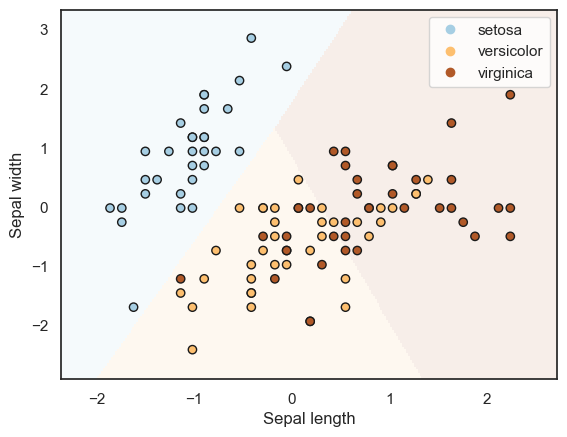

In [6]:
# This code is beyond the scope of this class, no need to understand what it does.
# Source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto', alpha=0.1, antialiased=True)

# Plot also the training points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend(handles=scatter.legend_elements()[0], labels=list(iris.target_names))
plt.show()

#### 1.3.5. Test accuracy

In [7]:
# Get test accuracy
test_acc = logreg.score(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 82.22%


#### 1.3.6. Other metrics

In [8]:
# We can easily use other metrics using sklearn.metrics
from sklearn.metrics import balanced_accuracy_score

# First we'll use the balanced accuracy
y_pred_train = logreg.predict(X_train)
train_balanced_acc = balanced_accuracy_score(y_train, y_pred_train)

y_pred_test = logreg.predict(X_test)
test_balanced_acc = balanced_accuracy_score(y_test, y_pred_test)

print(f"Train balanced acc: {train_balanced_acc*100:.2f}%")
print(f"Test balanced acc: {test_balanced_acc*100:.2f}%")

Train balanced acc: 81.98%
Test balanced acc: 79.49%


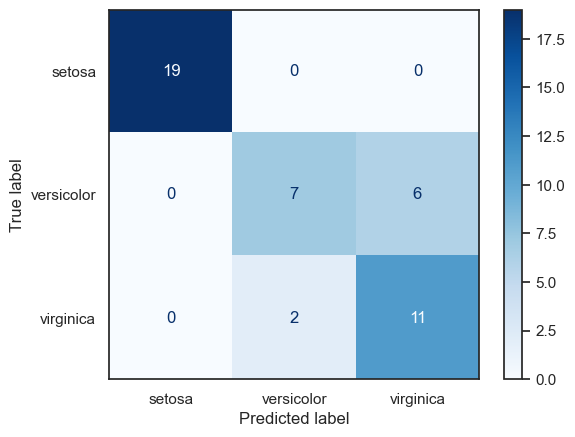

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Now we'll plot the confusion matrix of the testing data
conf_matrix = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(conf_matrix, display_labels=iris.target_names).plot(cmap=plt.cm.Blues)


### 1.4. Additional scikit-learn resources

This tutorial very briefly covers the scikit-learn package, and how it can be used to train a simple classifier. This package is capable of a lot more than what was shown here, as you will see in the rest of this exercise. If you want a more in-depth look at scikit-learn, take a look at these resources:

- scikit-learn Getting Started tutorial: https://scikit-learn.org/stable/getting_started.html
- scikit-learn User Guide: https://scikit-learn.org/stable/user_guide.html
- scikit-learn cheatsheet by Datacamp: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf
- scikit-learn tutorial from the Python Data Science Handbook: https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

## 2. Support Vector Machines

In class, we have covered the theory behind SVMs, and how they can be used to perform non-linear classification using the "kernel trick". In this exercise, you'll see how SVMs can easily be trained with scikit-learn, and how the choice of kernel can impact the performance on a non-linearly separable dataset.

### 2.1. Linear SVM

First we'll show how to train a simple SVM classifier.
In scikit-learn, the corresponding estimator is called `SVC` (Support Vector Classifier).

In this part, we'll use a toy dataset which is linearly separable, generated using the `datasets.make_blobs()` function.

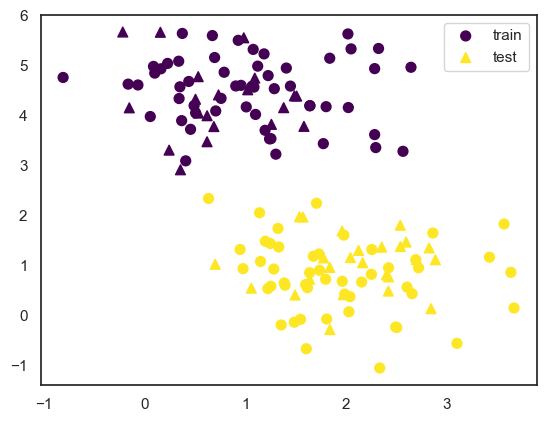

In [10]:
from helpers import plot_svc_decision_function
from sklearn.datasets import make_blobs

# Generate a linearly separable dataset
X, y = make_blobs(n_samples=150, centers=2, random_state=0, cluster_std=0.70)
# Split into train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot training and test data (color is for classes, shape is for train / test)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, marker='o', cmap="viridis", label="train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, marker='^', cmap="viridis", label="test")
plt.legend()
plt.show()

For this part, we'll train a SVM with a linear kernel. This corresponds to the basic SVM model that you've seen in class.

When initializing an instance of the SVC class, you can specify a regularization parameter C, and the strength of regularization is inversely proportional to C.  That is, a high value of C leads to low regularization and a low C leads to high regularization. 
Try changing the value of C. How does it affect the support vectors? 

**Answer:**
the smaller the C, the more support vectors we have. but after a certain value of c, the support vector stay the same and doesn't change the seperating line.

Train accuracy: 100.00%


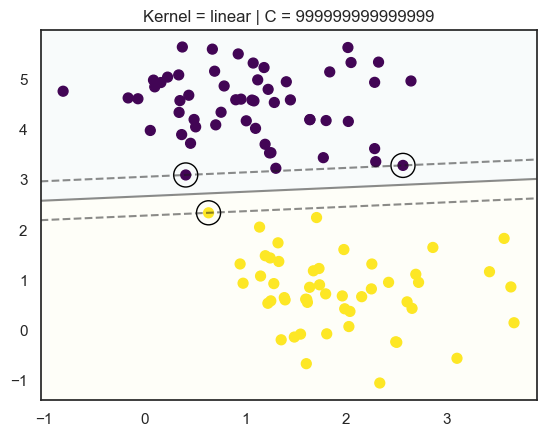

In [26]:
from sklearn.svm import SVC # SVC = Support vector classifier

# C is the regularization parameter. The strength of regularization is inversely proportional to C.
# Try very large and very small values of C
model = SVC(kernel='linear', C=999999999999999)
model.fit(X_train, y_train)

# Print training accuracy
train_acc = model.score(X_train, y_train)
print(f"Train accuracy: {train_acc * 100:.2f}%")

# Show decision function and support vectors
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap="viridis")
plt.title(f"Kernel = {model.kernel} | C = {model.C}")
plot_svc_decision_function(model, plot_support=True)

In [27]:
# Print test accuracy
test_acc = model.score(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 100.00%


### 2.2. Kernel SVM

Let's now use a non-linearly separable dataset, to observe the effect of the kernel function in SVMs.

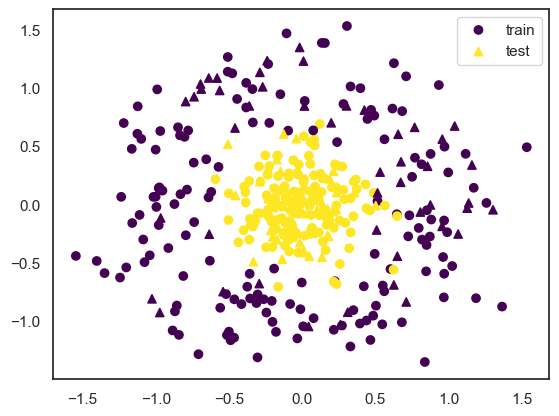

In [28]:
from sklearn.datasets import make_circles

# Generate a circular dataset
X, y = make_circles(n_samples=400, noise=0.25, factor=0, random_state=0)
# Split into train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Plot training and test data (color is for classes, shape is for train / test)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', cmap="viridis", label="train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='^', cmap="viridis", label="test")
plt.legend()
plt.show()

As you've seen in class, we can use kernel functions to allow SVMs to operate in high-dimensional, implicit feature spaces, without needing to compute the coordinates of the data in that space. We have seen a variety of kernel functions, such as the polynomial kernel and the RBF kernel.

In this exercise, experiment with the different kernels, such as:
- the linear kernel (`linear`): $\langle x, x'\rangle$
- the polynomial kernel (`poly`): $(\gamma \langle x, x'\rangle + r)^d$ (try out different degrees)
- the radial basis function kernel (`rbf`): $\exp(-\gamma \|x-x'\|^2)$

Your task is to experiment with these kernels to see which one does the best on this dataset. 

How does the kernel affect the decision boundary? Which kernel and value of C would you pick to maximize your model's performance? 

**Note:** Use the the helper function `plot_svc_decision_function()` to view the decision boundaries for each model.

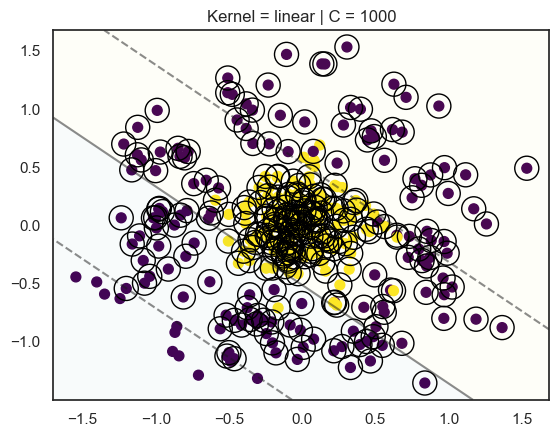

In [45]:
# Use as many code cells as needed to try out different kernels and values of C
### YOUR CODE HERE ###
model_LIN=SVC(kernel="linear",C=1000,gamma=0.5)
model_LIN.fit(X_train,y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap="viridis")
plt.title(f"Kernel = {model_LIN.kernel} | C = {model_LIN.C}")
plot_svc_decision_function(model_LIN)

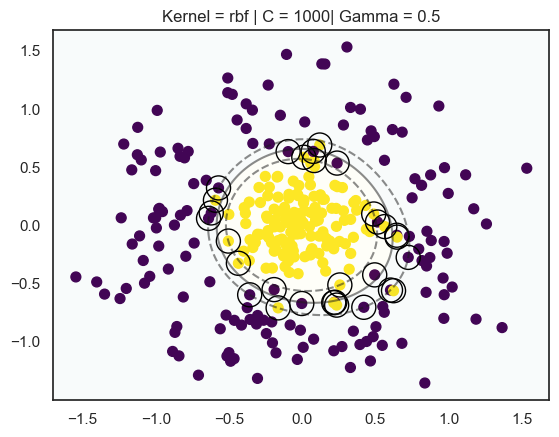

In [51]:
model_RBF=SVC(kernel="rbf",C=1000,gamma=0.5)
model_RBF.fit(X_train,y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap="viridis")
plt.title(f"Kernel = {model_RBF.kernel} | C = {model_RBF.C}| Gamma = {model_RBF.gamma}")
plot_svc_decision_function(model_RBF)

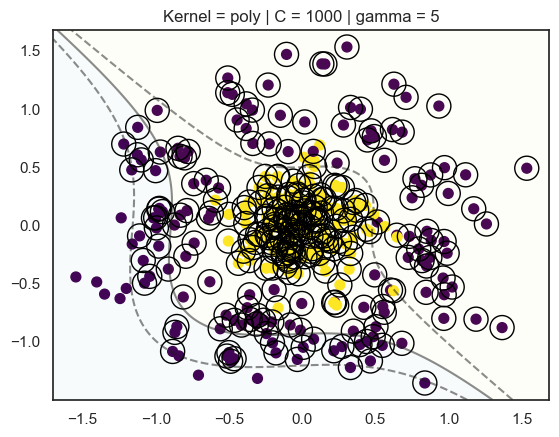

In [44]:
model_POL=SVC(kernel="poly",C=1000,gamma=5)
model_POL.fit(X_train,y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap="viridis")
plt.title(f"Kernel = {model_POL.kernel} | C = {model_POL.C} | gamma = {model_POL.gamma}")
plot_svc_decision_function(model_POL)

**Answer:**
the rbf kernel is the best way to seperate this type of data. the linearity of the linear and poly kernel give too big of missclasifications.


**To go further**: To learn more about SVMs in scikit-learn, and how to use them for multi-class classification and regression, check out the documentation page: https://scikit-learn.org/stable/modules/svm.html

## 3. Trees

Decision trees are a very intuitive way to classify objects: they ask a series of questions to infer the target variable. 

A decision tree is a set of nested decision rules. At each node $i$, the $d_i$-th feature of the input vector $ \boldsymbol{x}$ is compared to a treshold value $t$. The vector $\boldsymbol{x}$ is passed down to the left or right branch depending on whether $d_i$ is less than or greater than $t$. This process is repeated for each node encountered until a reaching leaf node, which specifies the predicted output.

<img src="images/simple_tree.png" width=400></img>

*Example of a simple decision tree on the Palmer Penguins dataset*

Decision trees are usually constructed from the top-down, by choosing a feature at each step that best splits the set of items. There are different metrics for measuring the "best" feature to pick, such as the Gini impurity and the entropy / information gain. We won't dive into them here, but we recommend reading Chapter 18 of ["Probabilistic Machine Learning: An Introduction"](https://probml.github.io/pml-book/) by K.P. Murphy if you want to learn more about them.

Decision trees are popular for several reasons:
- They are **easy to interpret**.
- They can handle mixed discrete and continuous inputs.
- They are insensitive to monotone transformations of the inputs, so there is no need to standardize the data.
- They perform automatic feature selection.
- They are fast to ﬁt, and scale well to large data sets.

Unfortunately, trees usually do not predict as accurately as other models we have seen previously, such as neural networks and SVMs.

It is however possible to significantly improve their performance through an ensemble learning method called **random forests**, which consists of constructing a multitude of decision trees at training time and averaging their outputs at test time. While random forests usually perform better than a single decision tree, they are much less interpretable. We won't cover random forests in this exercise, but keep in mind that they can be easily implemented in scikit-learn using the [`ensemble` module](https://scikit-learn.org/stable/modules/ensemble.html).

### 3.1. Training  decision trees

In this part, we will work on the Titanic dataset obtained at the end of the `05-pandas` tutorial. Our goal is to train a model to predict whether or not a passenger survived the shipwreck and to find out which features are the most useful for predicting this.

In [52]:
import pandas as pd
titanic = pd.read_csv("data/titanic.csv")

In [53]:
titanic.head(5)

,survived,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman,"fare_group_(-0.001, 7.854]","fare_group_(7.854, 10.5]","fare_group_(10.5, 21.679]","fare_group_(21.679, 39.688]","fare_group_(39.688, 512.329]"
0,0,3,22.0,1,0,7.2500,False,0,1,0,0,1,0,1,0,1,0,0,0,0
1,1,1,38.0,1,0,71.2833,False,1,0,1,0,0,0,0,1,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,True,1,0,0,0,1,0,0,1,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,False,1,0,0,0,1,0,0,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,1,0,0,1,0,1,0,0,1,0,0,0


In [54]:
# Split into X and y
X = titanic.drop(columns="survived")
y = titanic["survived"]
# Convert to NumPy (needed for interpretability function later on)
X_numpy, y_numpy = X.to_numpy(), y.to_numpy()

# Use 80% of data for train/val, 20% for test
X_trainval, X_test, y_trainval, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)
# Use 80% of trainval for train, 20% for val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)


It is now your turn to train decision trees in scikit-learn. They follow the same estimator API as all other supervised learning models, so the implementation is very straightforward. For more information, check out the [`tree` module](https://scikit-learn.org/stable/modules/tree.html#tree).

**Your task:** Initialize a `DecisionTreeClassifier` and train it on `X_train` and `y_train`. 
- Use "entropy" as the `criterion`
- Try out different values for the max tree depth. How does it affect the train and validation accuracy?

In [109]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

# Use the entropy (information gain) as the criterion
# Try varying the max depth

### YOUR CODE HERE ###
model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=10)
model.fit(X_train,y_train)
### END CODE HERE ###

train_acc = model.score(X_train, y_train)
print(f"Train accuracy: {train_acc * 100:.2f}%")

val_acc = model.score(X_val, y_val)
print(f"Validation accuracy: {val_acc * 100:.2f}%")

Train accuracy: 92.61%
Validation accuracy: 81.82%


In [92]:
test_acc = model.score(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 80.34%


**Answer:** the smaller the max_depth,the smaller the train accuracy gets and the higher the test accuracy is . the bigger the max_depth, the higher the training accuracy, but the more different the test accuracy gets and lower it becomes.
so it's better to have small max_depth but not too small.

### 3.2. Interpretability of trees

In this section, we'll show you how to visualize decision trees and interpret the decision made for some examples of our test set.

**Your task:** Run the next few cells to better understand the structure of the tree you just built. Can you identify which features are the most important for predicting whether or not a passenger survived?


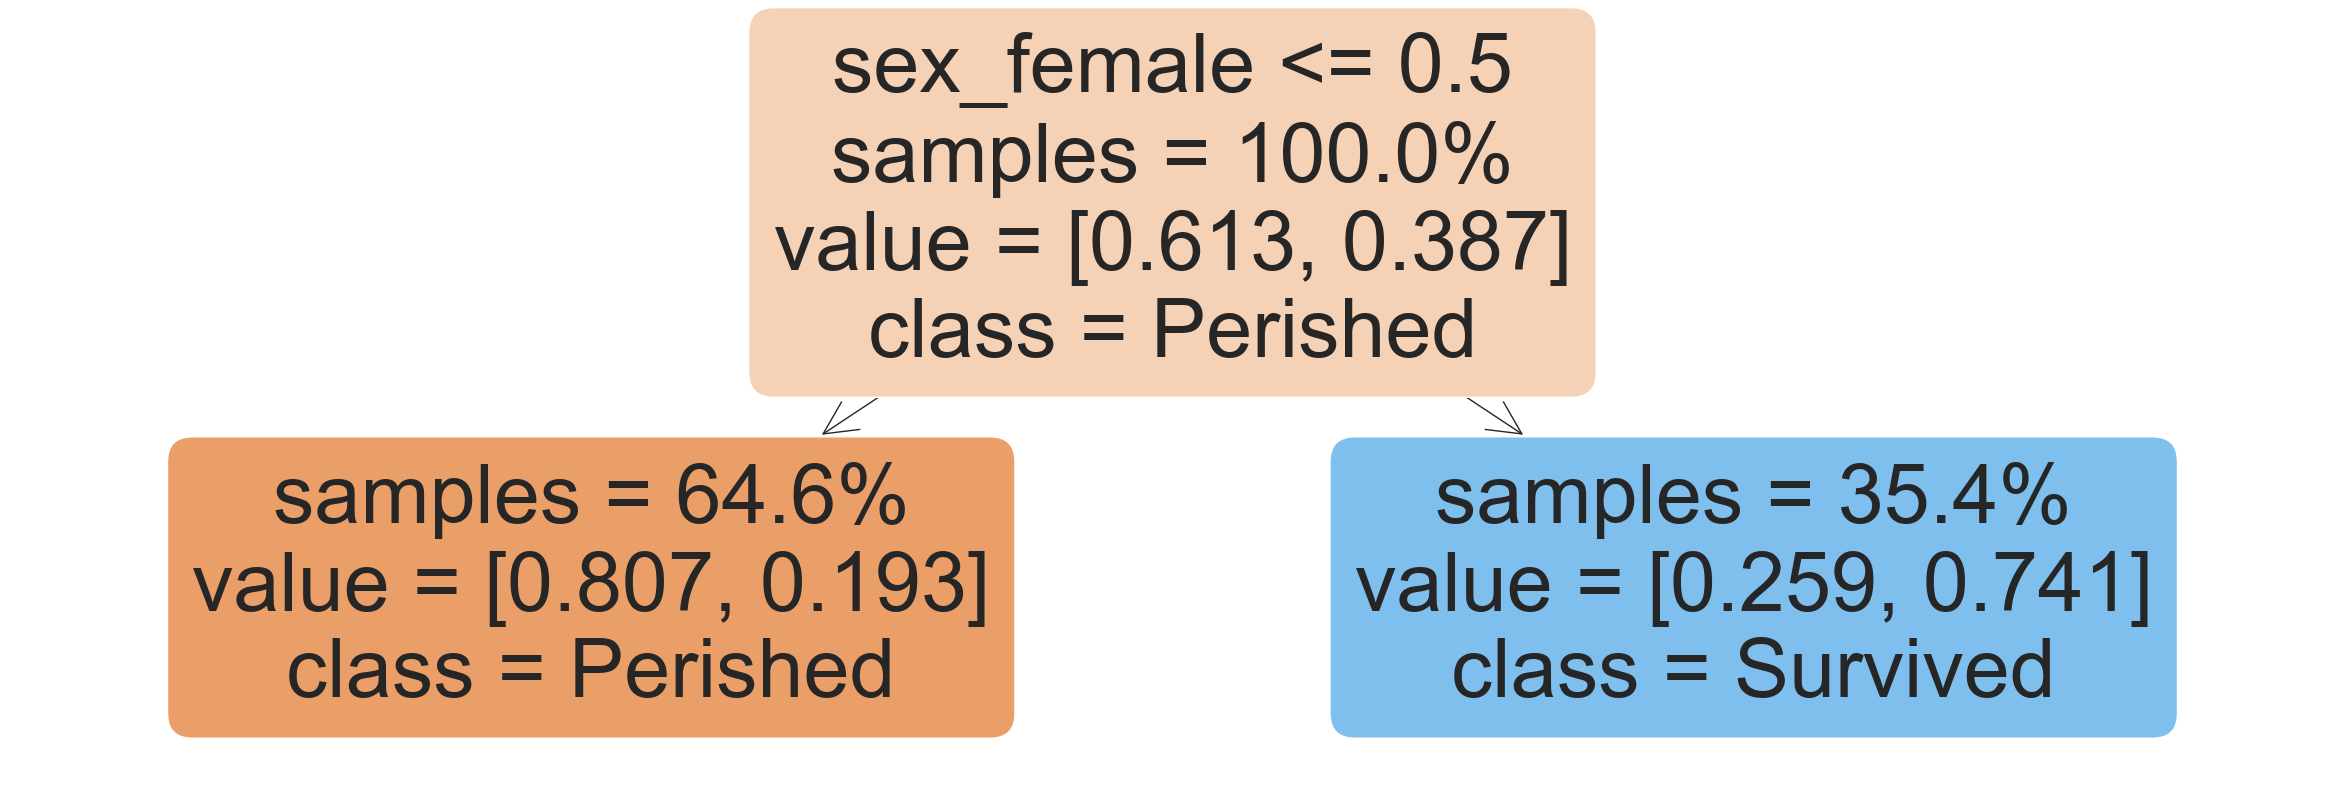

In [99]:
# Plots the decision tree
# Try out a max plot depth of 2 or 3, tree will be hard to read otherwise
plt.figure(figsize=(30, 10))
tree.plot_tree(model,  max_depth=2, filled=True, feature_names=X.columns, class_names=["Perished", "Survived"], 
               impurity=False, proportion=True, rounded=True)
plt.show()

In [105]:
# Prints the decision tree as text
# Will be very long if max depth is high
# Class 0 = Perished, Class 1 = Survived
print(tree.export_text(model, feature_names=list(X.columns)))

|--- sex_female <= 0.50
|   |--- fare <= 26.27
|   |   |--- age <= 10.00
|   |   |   |--- fare <= 20.83
|   |   |   |   |--- class: 1
|   |   |   |--- fare >  20.83
|   |   |   |   |--- class: 0
|   |   |--- age >  10.00
|   |   |   |--- age <= 32.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  32.50
|   |   |   |   |--- class: 0
|   |--- fare >  26.27
|   |   |--- sibsp <= 2.50
|   |   |   |--- age <= 51.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  51.50
|   |   |   |   |--- class: 0
|   |   |--- sibsp >  2.50
|   |   |   |--- age <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  3.50
|   |   |   |   |--- class: 0
|--- sex_female >  0.50
|   |--- pclass <= 2.50
|   |   |--- age <= 37.00
|   |   |   |--- class: 1
|   |   |--- age >  37.00
|   |   |   |--- fare <= 34.16
|   |   |   |   |--- class: 1
|   |   |   |--- fare >  34.16
|   |   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- fare <= 24.81
|   |   |   |--- embark_town_Southampton <= 0

In [110]:
# Explaining the decisions (complicated code, no need to understand what it does exactly)
def explain_decision(sample_id: int = 0):
    """Prints rules followed to obtain prediction for a sample of the test set
    
    Code adapted from: 
    https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
    """
    sample_id = sample_id
    class_names=["Perished", "Survived"]
    n_nodes = model.tree_.node_count
    children_left = model.tree_.children_left
    children_right = model.tree_.children_right
    feature = model.tree_.feature
    threshold = model.tree_.threshold

    node_indicator = model.decision_path(X_test)
    leaf_id = model.apply(X_test)
    # obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    prediction = class_names[model.predict(X_test[sample_id:sample_id+1])[0]]
    print(f"Prediction for sample {sample_id}: {prediction}\n")
    print("Rules used:")
    for node_id in node_index:
        # continue to the next node if it is a leaf node
        if leaf_id[sample_id] == node_id:
            continue

        # check if value of the split feature for sample 0 is below threshold
        if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("- node {node}: ({feature} = {value}) "
              "{inequality} {threshold}".format(
                  node=node_id,
                  feature=X.columns[feature[node_id]],
                  value=X_test[sample_id, feature[node_id]],
                  inequality=threshold_sign,
                  threshold=threshold[node_id]))

In [111]:
# For binary variables, 1 = True, 0 = False
# e.g. sex_male = 1 -> male, sex_male = 0 -> female
# Many of the features are redundant (e.g. sex_male and sex_female)
# so the tree doesn't always choose the same features 

explain_decision(sample_id=0)

Prediction for sample 0: Perished

Rules used:
- node 0: (sex_female = 0) <= 0.5
- node 1: (fare = 7.8542) <= 26.268750190734863
- node 2: (age = 28.0) > 10.0
- node 6: (age = 28.0) <= 32.5
- node 7: (fare = 7.8542) > 7.133349895477295
- node 9: (fare = 7.8542) > 7.183349847793579
- node 11: (age = 28.0) <= 30.75
- node 12: (age = 28.0) > 20.5
- node 20: (fare = 7.8542) > 7.745850086212158
- node 22: (embark_town_Southampton = 1) > 0.5


In [113]:
explain_decision(sample_id=1)

Prediction for sample 1: Survived

Rules used:
- node 0: (sex_female = 1) > 0.5
- node 78: (pclass = 1) <= 2.5
- node 79: (age = 14.0) <= 37.0


**Answer:** 
by changing the max_depth, we see more and more factors that are used to determine whether or not the passenger has perished or not.


the most used ones are the sex, fare,pclass and age

**To go further:** Decision trees and random forests can also be used for regression, check out the scikit-learn pages on [trees](https://scikit-learn.org/stable/modules/tree.html#tree) and [ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#ensemble) for more info.

## 4. A small note on unsupervised learning

While we won't cover them in this exercise, most of the unsupervised learning techniques seen in class can be easily implemented with scikit-learn.

As an example, here is how to use the k-means clustering algorithm on a toy dataset consisting of 7 unlabeled blobs of points. 
When choosing $k=7$, k-means manages to almost perfectly recover the original blobs.


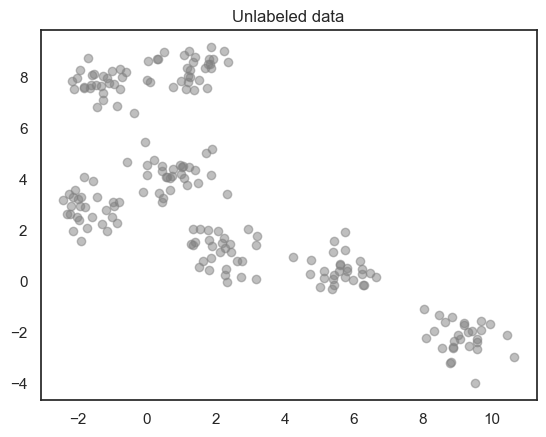

c:\Users\Startklar\anaconda3\envs\introml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Startklar\anaconda3\envs\introml\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


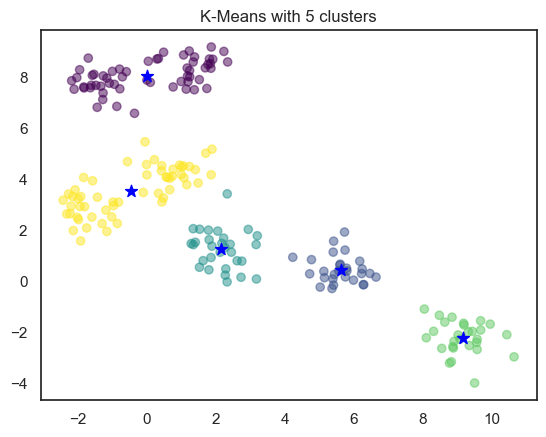

In [117]:
from sklearn.cluster import KMeans

# Generate unlabeled data
X_blobs, _ = make_blobs(n_samples=200, centers=7, random_state=0, cluster_std=0.60)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c="grey", alpha=0.5)
plt.title("Unlabeled data")
plt.show()

# Run k-means on data to find the blobs

# Try changing the value of k
k = 5
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(X_blobs)

# Display clusters and their centers
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=labels, cmap="viridis", alpha=0.5)
for c in kmeans.cluster_centers_:
        plt.scatter(c[0], c[1], marker="*", s=80, color="blue")
plt.title(f"K-Means with {k} clusters")
plt.show()

To learn more about how to practically implement these techniques, check out these resources:

**For dimensionality reduction:**
- [PCA from the Python Data Science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)
- [Manifold learning from the Python Data Science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html)
- [Decomposition page on scikit-learn's website](https://scikit-learn.org/stable/modules/decomposition.html)
- [Manifold learning page on scikit-learn's website](https://scikit-learn.org/stable/modules/manifold.html)

**For clustering:**
- [k-means from the Python Data Science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)
- [Gaussian mixtures from the Python Data Science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)
- [Clustering page on scikit-learn's website](https://scikit-learn.org/stable/modules/clustering.html)


## Congratulations!

Congratulations on completing this final exercise!

Throughout this series of exercises, you learned about the fundamental tools and libraries used in machine learning, and worked on practical implementations of many of the most commonly used techniques in this field. 

As long as these exercises have been, they are still too short to cover several other interesting and important machine learning topics, but we believe you now have all the tools at your disposal to learn about them on your own, if you desire to do so.  

Thank you for sticking with us through the end, we really hope you enjoyed the exercises in this course!

<img src="images/thats_all_folks.png" width=400></img>